Files already downloaded and verified
Files already downloaded and verified
Epoch [10/200], Train Loss: 0.1664, Val Loss: 1.0951
Epoch [20/200], Train Loss: 0.0040, Val Loss: 1.5365
Epoch [30/200], Train Loss: 0.0028, Val Loss: 1.5268
Epoch [40/200], Train Loss: 0.0021, Val Loss: 1.5168
Epoch [50/200], Train Loss: 0.0018, Val Loss: 1.5214
Epoch [60/200], Train Loss: 0.0017, Val Loss: 1.5232
Epoch [70/200], Train Loss: 0.0017, Val Loss: 1.5234
Epoch [80/200], Train Loss: 0.0017, Val Loss: 1.5232
Epoch [90/200], Train Loss: 0.0017, Val Loss: 1.5232
Epoch [100/200], Train Loss: 0.0017, Val Loss: 1.5232
Epoch [110/200], Train Loss: 0.0017, Val Loss: 1.5232
Epoch [120/200], Train Loss: 0.0017, Val Loss: 1.5231
Epoch [130/200], Train Loss: 0.0017, Val Loss: 1.5231
Epoch [140/200], Train Loss: 0.0017, Val Loss: 1.5230
Epoch [150/200], Train Loss: 0.0017, Val Loss: 1.5229
Epoch [160/200], Train Loss: 0.0017, Val Loss: 1.5229
Epoch [170/200], Train Loss: 0.0017, Val Loss: 1.5228
Epoch [180/200]

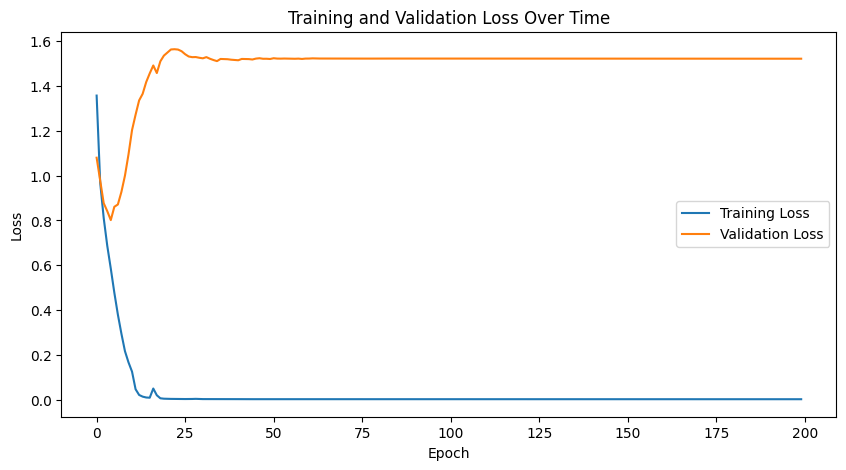

In [3]:
##Homework 7
##1a

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data preprocessing
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
        ])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                        shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                       shuffle=False, num_workers=2)

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 8 * 8, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 64 * 8 * 8)  # Flatten the output
        x = self.fc_layers(x)
        return x

# Initialize model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Add learning rate scheduling
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training loop
train_losses = []
val_losses = []  # New list for validation losses
start_time = time.time()

for epoch in range(200):
    # Training phase
    running_loss = 0.0
    model.train()
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    
    val_epoch_loss = val_running_loss / len(testloader)
    val_losses.append(val_epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/200], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

    # Update learning rate
    scheduler.step(val_epoch_loss)

training_time = time.time() - start_time
print(f'Training finished in {training_time/60:.2f} minutes')

# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [4]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    size_in_bytes = total_params * 4  # Assuming 32-bit floats
    size_in_megabytes = size_in_bytes / (1024 ** 2)
    return size_in_megabytes

model_size = get_model_size(model)
print(f'Model size: {model_size:.2f} MB')

Model size: 4.08 MB


Epoch [10/200], Train Loss: 0.1635, Val Loss: 0.9184
Epoch [20/200], Train Loss: 0.0034, Val Loss: 1.3571
Epoch [30/200], Train Loss: 0.0009, Val Loss: 1.4259
Epoch [40/200], Train Loss: 0.0010, Val Loss: 1.3813
Epoch [50/200], Train Loss: 0.0009, Val Loss: 1.3799
Epoch [60/200], Train Loss: 0.0009, Val Loss: 1.3820
Epoch [70/200], Train Loss: 0.0009, Val Loss: 1.3825
Epoch [80/200], Train Loss: 0.0009, Val Loss: 1.3831
Epoch [90/200], Train Loss: 0.0009, Val Loss: 1.3831
Epoch [100/200], Train Loss: 0.0009, Val Loss: 1.3831
Epoch [110/200], Train Loss: 0.0009, Val Loss: 1.3830
Epoch [120/200], Train Loss: 0.0009, Val Loss: 1.3830
Epoch [130/200], Train Loss: 0.0009, Val Loss: 1.3829
Epoch [140/200], Train Loss: 0.0009, Val Loss: 1.3829
Epoch [150/200], Train Loss: 0.0009, Val Loss: 1.3828
Epoch [160/200], Train Loss: 0.0009, Val Loss: 1.3828
Epoch [170/200], Train Loss: 0.0009, Val Loss: 1.3827
Epoch [180/200], Train Loss: 0.0009, Val Loss: 1.3827
Epoch [190/200], Train Loss: 0.0009, 

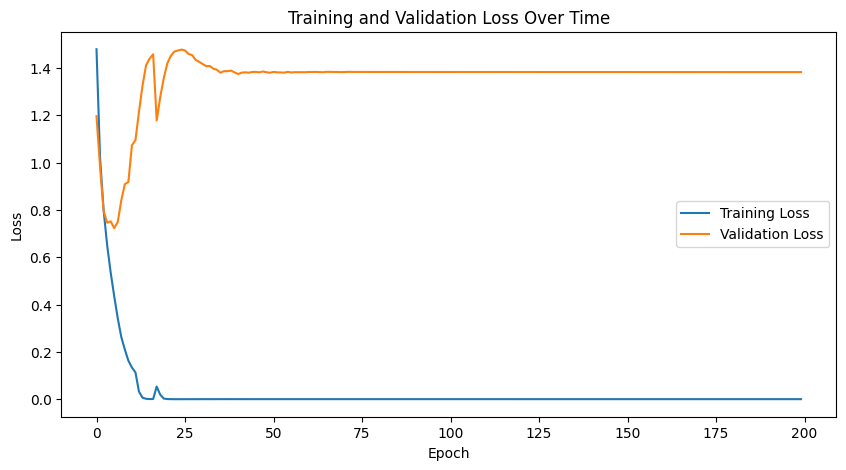

In [5]:
##1b

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers remain the same
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
       
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 2 * 2, 256),  
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 256 * 2 * 2)  
        x = self.fc_layers(x)
        return x

# Initialize model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Add learning rate scheduling
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training loop
train_losses = []
val_losses = [] 
start_time = time.time()

for epoch in range(200):
    # Training phase
    running_loss = 0.0
    model.train()
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    
    val_epoch_loss = val_running_loss / len(testloader)
    val_losses.append(val_epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/200], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

    # Update learning rate
    scheduler.step(val_epoch_loss)

training_time = time.time() - start_time
print(f'Training finished in {training_time/60:.2f} minutes')

# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    size_in_bytes = total_params * 4  # Assuming 32-bit floats
    size_in_megabytes = size_in_bytes / (1024 ** 2)
    return size_in_megabytes

model_size = get_model_size(model)
print(f'Model size: {model_size:.2f} MB')

Model size: 2.49 MB


Epoch [10/200], Train Loss: 0.1958, Val Loss: 0.5252
Epoch [20/200], Train Loss: 0.0323, Val Loss: 0.6354
Epoch [30/200], Train Loss: 0.0009, Val Loss: 0.5825
Epoch [40/200], Train Loss: 0.0005, Val Loss: 0.5941
Epoch [50/200], Train Loss: 0.0003, Val Loss: 0.5794
Epoch [60/200], Train Loss: 0.0002, Val Loss: 0.5901
Epoch [70/200], Train Loss: 0.0002, Val Loss: 0.5828
Epoch [80/200], Train Loss: 0.0002, Val Loss: 0.5854
Epoch [90/200], Train Loss: 0.0002, Val Loss: 0.5831
Epoch [100/200], Train Loss: 0.0002, Val Loss: 0.5862
Epoch [110/200], Train Loss: 0.0002, Val Loss: 0.5924
Epoch [120/200], Train Loss: 0.0002, Val Loss: 0.5844
Epoch [130/200], Train Loss: 0.0002, Val Loss: 0.5841
Epoch [140/200], Train Loss: 0.0002, Val Loss: 0.5852
Epoch [150/200], Train Loss: 0.0002, Val Loss: 0.5874
Epoch [160/200], Train Loss: 0.0002, Val Loss: 0.5893
Epoch [170/200], Train Loss: 0.0002, Val Loss: 0.5864
Epoch [180/200], Train Loss: 0.0002, Val Loss: 0.5929
Epoch [190/200], Train Loss: 0.0002, 

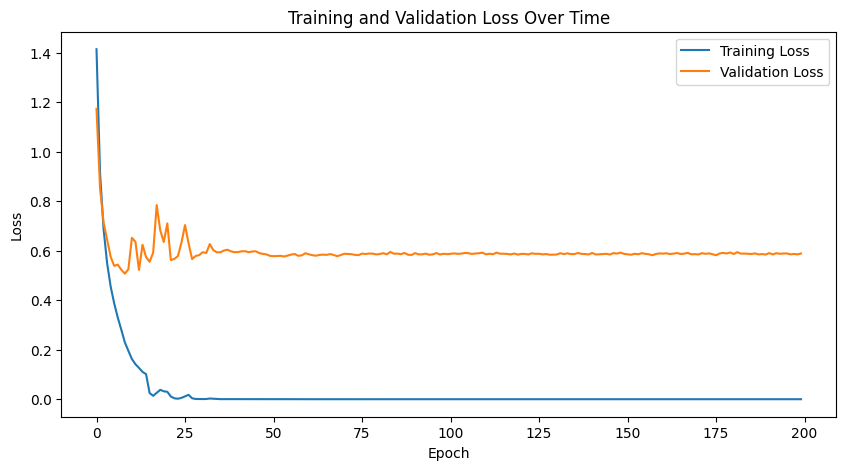

In [7]:
##2


# Define the ResNet block
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        
    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = torch.relu(out)
        return out


class ResNet10(nn.Module):
    def __init__(self):
        super(ResNet10, self).__init__()
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Create 10 ResNet blocks across different scales
        self.layer1 = self.make_layer(64, 2, stride=1)    # 2 blocks
        self.layer2 = self.make_layer(128, 2, stride=2)   # 2 blocks
        self.layer3 = self.make_layer(256, 3, stride=2)   # 3 blocks
        self.layer4 = self.make_layer(512, 3, stride=2)   # 3 blocks
        
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, 10)
        
    def make_layer(self, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(ResBlock(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Initialize model, loss function, and optimizer
model = ResNet10().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Add learning rate scheduling
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training loop
train_losses = []
val_losses = []  
start_time = time.time()

for epoch in range(200):
    # Training phase
    running_loss = 0.0
    model.train()
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    
    val_epoch_loss = val_running_loss / len(testloader)
    val_losses.append(val_epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/200], Train Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

    # Update learning rate
    scheduler.step(val_epoch_loss)

training_time = time.time() - start_time
print(f'Training finished in {training_time/60:.2f} minutes')

# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    size_in_bytes = total_params * 4  # Assuming 32-bit floats
    size_in_megabytes = size_in_bytes / (1024 ** 2)
    return size_in_megabytes

model_size = get_model_size(model)
print(f'Model size: {model_size:.2f} MB')

Model size: 65.14 MB
